In [1]:
# imports
import numpy as np
import pandas as pd
import json

# modelling
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, precision_recall_curve, auc, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Tree Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist = keras.datasets.mnist
anomalies = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(anomalous_train_data, anomalous_train_labels), (anomalous_test_data, anomalous_test_labels) = anomalies.load_data()

anomalous_test_data = anomalous_test_data[:100]
anomalous_train_data = anomalous_train_data[:600]
anomalous_test_labels = anomalous_test_labels[:100]
anomalous_train_labels = anomalous_train_labels[:600]

In [3]:
y_test_binary = np.ones(len(y_test))
y_train_binary = np.ones(len(y_train))
anomalous_test_binary = np.zeros(len(anomalous_test_labels))
anomalous_train_binary = np.zeros(len(anomalous_train_labels))

In [4]:
x_data = np.concatenate((x_train, x_test))
y_labels = np.concatenate((y_test_binary, y_train_binary))
anom_data = np.concatenate((anomalous_train_data, anomalous_test_data))
anom_labels = np.concatenate((anomalous_test_binary, anomalous_train_binary))

data = np.concatenate((x_data, anom_data))
labels = np.concatenate((y_labels, anom_labels))

In [5]:
uq, counts = np.unique(labels, return_counts=True)
print(uq)
print(counts)

[0. 1.]
[  700 70000]


In [6]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [7]:
# Normalize pixel values to the range [0, 1]
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

train_data = train_data.reshape(-1, 28 * 28)
test_data = test_data.reshape(-1, 28 * 28)

In [8]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [9]:
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anom_train_data = train_data[~train_labels]
anom_test_data = test_data[~test_labels]

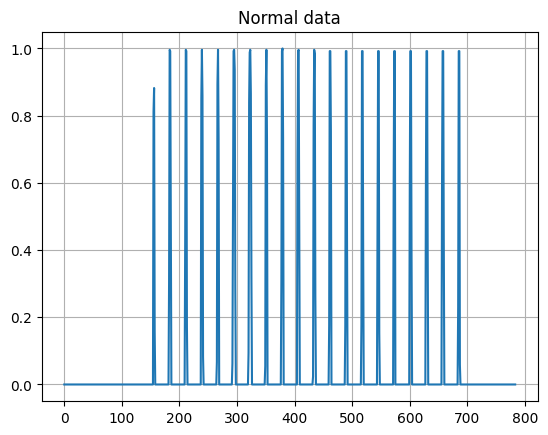

In [10]:
plt.grid()
plt.plot(np.arange(784), normal_train_data[0])
plt.title("Normal data")
plt.show()

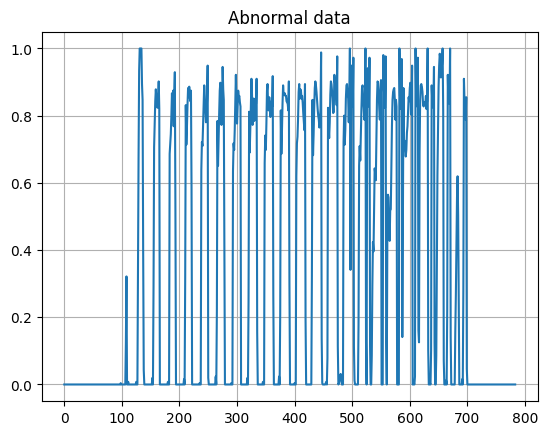

In [11]:
plt.grid()
plt.plot(np.arange(784), anom_train_data[0])
plt.title("Abnormal data")
plt.show()

In [12]:
# Create and train an Isolation Forest model
model = IsolationForest(contamination=0.01, n_estimators=256, random_state=21, max_features=784, bootstrap=True)
model.fit(normal_train_data)

IsolationForest(bootstrap=True, contamination=0.01, max_features=784,
                n_estimators=256, random_state=21)

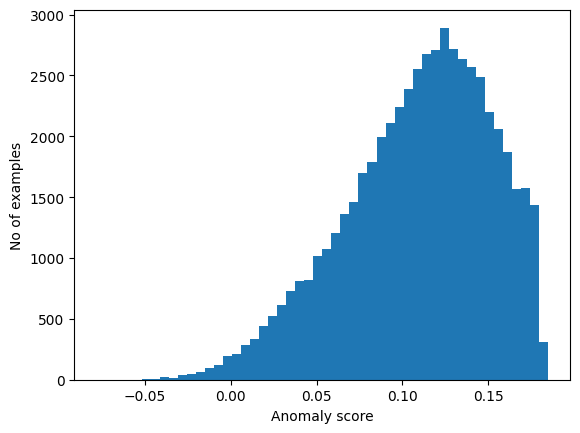

In [13]:
scores = model.decision_function(normal_train_data)

plt.hist(scores[:], bins=50)
plt.xlabel("Anomaly score")
plt.ylabel("No of examples")
plt.show()

In [14]:
threshold = np.mean(scores) - np.std(scores)
print("Threshold ", threshold)

Threshold  0.06696213446610776


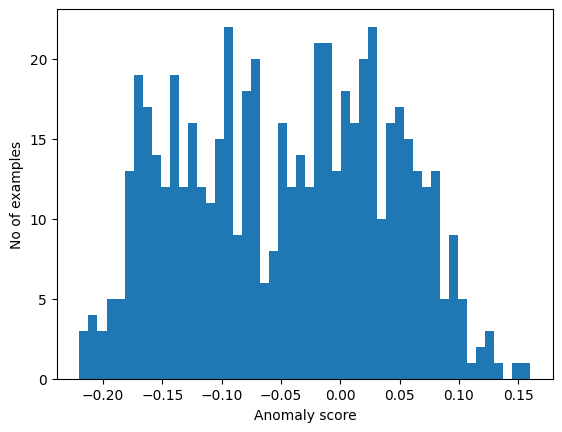

In [15]:
scores_anom = model.decision_function(anom_train_data)

plt.hist(scores_anom[:], bins=50)
plt.xlabel("Anomaly score")
plt.ylabel("No of examples")
plt.show()

In [16]:
threshold_anom = np.mean(scores_anom) - np.std(scores_anom)
print("Threshold ", threshold_anom)

Threshold  -0.1314097966097733


In [17]:
def predict(model, data):
    predictions = model.predict(data)
    scorer = model.decision_function(data)
    return tf.math.greater(scorer, predictions)

def get_metrics(predictions, labels):
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='binary')
    recall = recall_score(labels, predictions, average='binary')
    report = classification_report(labels, predictions, target_names=['anomaly', 'normal'])
    cm = confusion_matrix(labels, predictions)
    return accuracy, precision, recall, report, cm


def print_stats(accuracy, precision, recall, report, cm):
    print("Accuracy = {}".format(accuracy))
    print("Precision = {}".format(precision))
    print("Recall = {}".format(recall))
    print("Report\n {}".format(report))
    print("Confusion Matrix")
    print(cm)

In [18]:
print(-1 == False)

False


In [19]:
test_labels = [1 if label == True else 0 for label in test_labels]
print(test_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [20]:
# preds = predict(model, test_data, threshold)
preds = model.predict(test_data)
preds = [1 if label == 1 else 0 for label in preds]
a, p, r, report, cm = get_metrics(preds, test_labels)
print_stats(a, p, r, report, cm)

Accuracy = 0.9869165487977369
Precision = 0.996338574197717
Recall = 0.9904367684841564
Report
               precision    recall  f1-score   support

     anomaly       0.36      0.60      0.45       128
      normal       1.00      0.99      0.99     14012

    accuracy                           0.99     14140
   macro avg       0.68      0.80      0.72     14140
weighted avg       0.99      0.99      0.99     14140

Confusion Matrix
[[   77    51]
 [  134 13878]]


In [21]:
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 77
False Positives: 51
False Negatives: 134
True Positives: 13878


<Axes: >

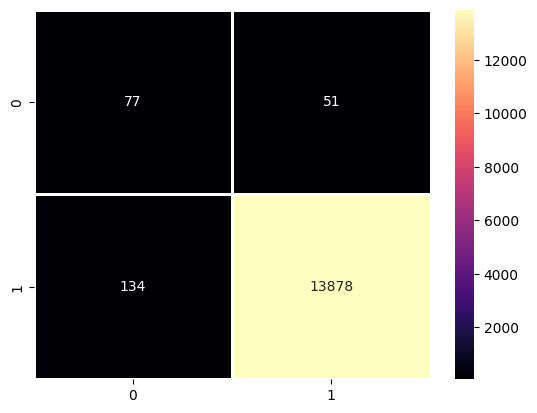

In [22]:
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', linewidths=1)

In [28]:
def pr_auc_plot(predicitons, labels):
    precision_curve, recall_curve, _ = precision_recall_curve(labels, predicitons)

    pr_auc = auc(recall_curve, precision_curve)
    print(recall_curve)
    print(precision_curve)
    # Plot the precision-recall curve
    plt.figure()
    plt.plot(recall_curve, precision_curve, color='darkorange', lw=2, label='PR Curve (area = %0.2f)' % pr_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower right')
    plt.show()
    print()

In [24]:
def roc_plot(predicitons, labels):
    fpr, tpr, thresholds = roc_curve(labels, predicitons)
    roc_auc = roc_auc_score(labels, predicitons)
    # Plot ROC curve, FPR vs TPR, and True Positive Rate vs Threshold in a single plot
    plt.figure(figsize=(12, 8))

    # Plot ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Plot False Positive Rate vs Threshold
    plt.plot(thresholds, fpr, color='blue', lw=2, label='False Positive Rate (FPR)')

    # Plot True Positive Rate vs Threshold
    plt.plot(thresholds, tpr, color='green', lw=2, label='True Positive Rate (TPR)')

    # Set labels and title
    plt.xlabel('Threshold')
    plt.ylabel('Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve and Rates vs Threshold')
    plt.legend(loc='lower right')

    # Show the combined plot
    plt.show()

[1.         0.99043677 0.        ]
[0.99094767 0.99633857 1.        ]


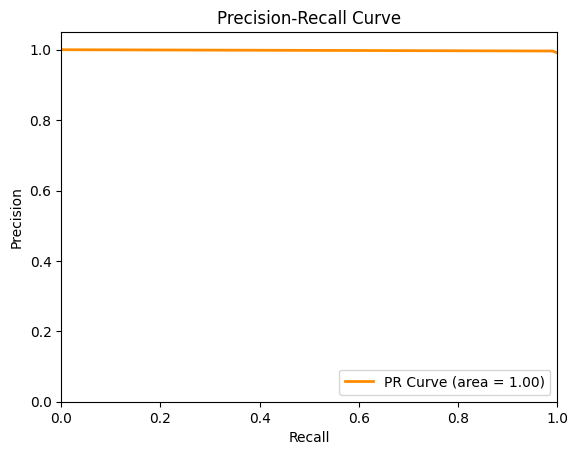

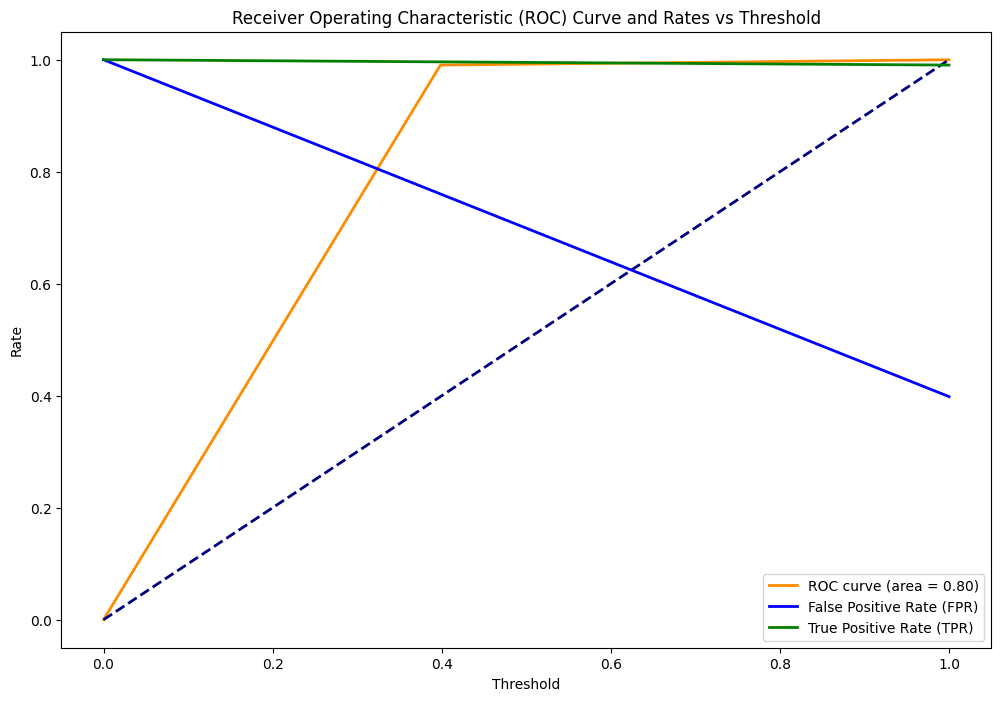

In [29]:
pr_auc_plot(preds, test_labels)
roc_plot(preds, test_labels)

In [30]:
# Assuming predictions and labels are your model predictions and true labels
predictions = model.decision_function(test_data)
labels = test_labels

# Calculate precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(labels, predictions)

# Calculate PR-AUC
pr_auc = auc(recall_curve, precision_curve)

print("PR-AUC: {:.2f}".format(pr_auc))

PR-AUC: 1.00
